# Import dependencies, open sqlite DB

In [26]:
import sqlite3 as s3
import matplotlib.pyplot as plt
import numpy as np

In [27]:
db = s3.connect('../deepBlue.db')
c = db.cursor()

# Compute some stats

In [28]:
%matplotlib inline

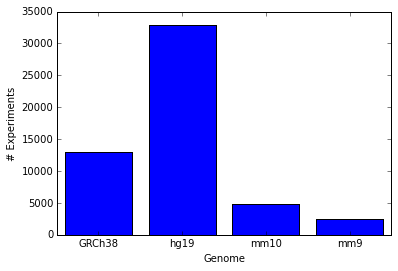

In [39]:
genomes = c.execute('SELECT genome, COUNT(*) FROM experiments GROUP BY genome').fetchall()

names = map(lambda (g,_): g, genomes)
count = map(lambda (_,c): c, genomes)

y_pos = np.arange(len(names))
plt.bar(y_pos, count, align='center')
plt.xticks(y_pos, names)
plt.xlabel('Genome')
plt.ylabel('# Experiments')
plt.show()

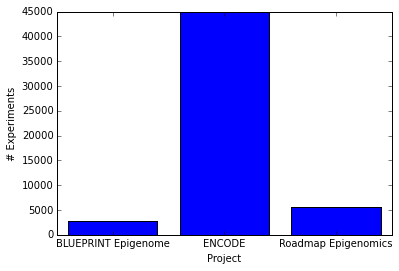

In [40]:
genomes = c.execute('SELECT project, COUNT(*) FROM experiments GROUP BY project').fetchall()

names = map(lambda (g,_): g, genomes)
count = map(lambda (_,c): c, genomes)

y_pos = np.arange(len(names))
plt.bar(y_pos, count, align='center')
plt.xticks(y_pos, names)
plt.xlabel('Project')
plt.ylabel('# Experiments')
plt.show()

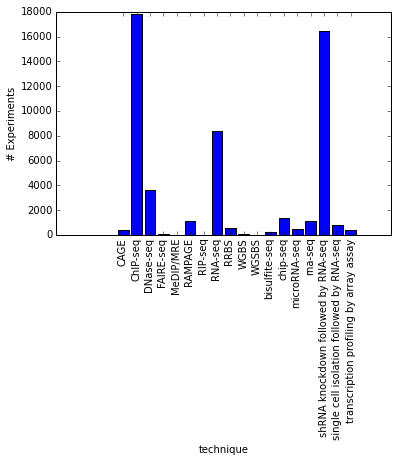

In [43]:
genomes = c.execute('SELECT technique, COUNT(*) FROM experiments GROUP BY technique').fetchall()

names = map(lambda (g,_): g, genomes)
count = map(lambda (_,c): c, genomes)

y_pos = np.arange(len(names))
plt.bar(y_pos, count, align='center')
plt.xticks(y_pos, names, rotation='vertical')
plt.xlabel('technique')
plt.ylabel('# Experiments')
plt.show()

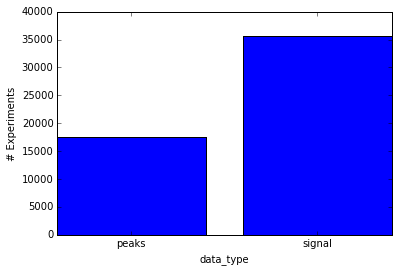

In [45]:
genomes = c.execute('SELECT data_type, COUNT(*) FROM experiments GROUP BY data_type').fetchall()

names = map(lambda (g,_): g, genomes)
count = map(lambda (_,c): c, genomes)

y_pos = np.arange(len(names))
plt.bar(y_pos, count, align='center')
plt.xticks(y_pos, names)
plt.xlabel('data_type')
plt.ylabel('# Experiments')
plt.show()

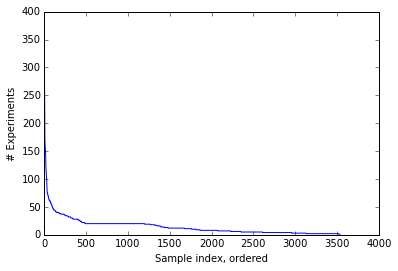

In [51]:
genomes = c.execute('SELECT sample_id,COUNT(DISTINCT _id) AS nbr FROM experiments GROUP BY sample_id ORDER BY nbr DESC;').fetchall()

names = map(lambda (g,_): g, genomes)
count = map(lambda (_,c): c, genomes)

y_pos = np.arange(len(names))
plt.plot(np.arange(len(names)), count)
plt.xlabel('Sample index, ordered')
plt.ylabel('# Experiments')
plt.show()

In [54]:
sample_keys = c.execute('SELECT key,COUNT(*) cnt FROM sample_info GROUP BY key ORDER BY cnt DESC;').fetchall()
sample_keys

[(u'biosource_name', 3537),
 (u'source', 3537),
 (u'@id', 2971),
 (u'@type:0', 2971),
 (u'@type:1', 2971),
 (u'accession', 2971),
 (u'award', 2971),
 (u'biosample_term_id', 2971),
 (u'biosample_term_name', 2971),
 (u'biosample_type', 2971),
 (u'date_created', 2971),
 (u'lab', 2971),
 (u'schema_version', 2971),
 (u'status', 2971),
 (u'uuid', 2971),
 (u'life_stage', 2943),
 (u'sex', 2921),
 (u'age', 2812),
 (u'donor', 2736),
 (u'organism', 2736),
 (u'submitted_by', 2736),
 (u'description', 2643),
 (u'age_units', 2494),
 (u'age_display', 2492),
 (u'health_status', 2283),
 (u'aliases:0', 2269),
 (u'protocol_documents:0', 2182),
 (u'product_id', 1756),
 (u'synonyms:0', 1500),
 (u'dbxrefs:0', 1437),
 (u'lot_id', 1301),
 (u'synonyms:1', 1279),
 (u'culture_harvest_date', 1120),
 (u'system_slims:0', 997),
 (u'summary', 971),
 (u'transfection_type', 943),
 (u'developmental_slims:0', 919),
 (u'culture_start_date', 903),
 (u'organ_slims:0', 885),
 (u'rnais:0', 878),
 (u'transfection_method', 872),

In [56]:
biosources = c.execute("SELECT value,COUNT(*) cnt FROM sample_info WHERE key='biosource_name' GROUP BY value ORDER BY cnt DESC;").fetchall()
biosources

[(u'K562', 607),
 (u'HepG2', 491),
 (u'A549', 112),
 (u'Purkinje cell', 92),
 (u'GM12878', 62),
 (u'liver', 62),
 (u'macrophage', 54),
 (u'myeloid cell', 47),
 (u'heart', 41),
 (u'MCF-7', 40),
 (u'pyramidal neuron', 37),
 (u'mature neutrophil', 35),
 (u'HeLa-S3', 29),
 (u'CD14-positive, CD16-negative classical monocyte', 28),
 (u'BLOOD', 27),
 (u'lung', 27),
 (u'midbrain', 25),
 (u'hindbrain', 24),
 (u'kidney', 24),
 (u'limb', 24),
 (u'brain', 21),
 (u'forebrain', 21),
 (u'hematopoietic multipotent progenitor cell', 21),
 (u'stomach', 21),
 (u'CD4-positive, alpha-beta T cell', 20),
 (u'erythroblast', 20),
 (u'endothelial cell of umbilical vein', 19),
 (u'inflammatory macrophage', 19),
 (u'embryonic stem cell', 17),
 (u'keratinocyte', 17),
 (u'neural tube', 16),
 (u'H1-hESC', 15),
 (u'Ishikawa', 15),
 (u'skeletal muscle tissue', 15),
 (u'T47D', 14),
 (u'alternatively activated macrophage', 14),
 (u'B cell', 13),
 (u'BRAIN', 13),
 (u'SK-N-SH', 13),
 (u'fibroblast of lung', 13),
 (u'monoc

In [57]:
sources = c.execute("SELECT value,COUNT(*) cnt FROM sample_info WHERE key='source' GROUP BY value ORDER BY cnt DESC;").fetchall()
sources

[(u'ENCODE', 2971),
 (u'BLUEPRINT Epigenomics', 439),
 (u'Roadmap Epigenomics', 127)]

In [58]:
meta_keys = c.execute('SELECT key,COUNT(*) cnt FROM extra_metadata GROUP BY key ORDER BY cnt DESC;').fetchall()
meta_keys

[(u'assembly', 44916),
 (u'depleted_in_term_id', 44916),
 (u'depleted_in_term_name', 44916),
 (u'experiment_encode_accession', 44916),
 (u'experiment_url', 44916),
 (u'file_encode_accession', 44916),
 (u'file_status', 44916),
 (u'file_type', 44916),
 (u'file_url', 44916),
 (u'lab_@id', 44916),
 (u'lab_address1', 44916),
 (u'lab_city', 44916),
 (u'lab_country', 44916),
 (u'lab_fax', 44916),
 (u'lab_institute_label', 44916),
 (u'lab_institute_name', 44916),
 (u'lab_name', 44916),
 (u'lab_phone1', 44916),
 (u'lab_phone2', 44916),
 (u'lab_pi', 44916),
 (u'lab_postal_code', 44916),
 (u'lab_schema_version', 44916),
 (u'lab_state', 44916),
 (u'lab_status', 44916),
 (u'lab_title', 44916),
 (u'lab_uuid', 44916),
 (u'nucleic_acid_term_name', 44916),
 (u'original_file_size', 44916),
 (u'original_file_url', 44916),
 (u'output_category', 44916),
 (u'output_type', 44916),
 (u'status', 44916),
 (u'submitted_file_name', 43750),
 (u'lab_address2', 33311),
 (u'biological_replicate_number', 33176),
 (u't